 # Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the Dataset

In [ ]:
# Load dataset
df = pd.read_csv("sales_data.csv")  

# Display first 5 rows
df.head()


,Date,Product,Region,Sales,Profit,Discount,Category
0,2024-01-01,Laptop,North,1200,200,0.10,Electronics
1,2024-01-02,Tablet,South,800,150,0.15,Electronics
2,2024-01-03,Smartphone,East,1500,300,0.20,Electronics
3,2024-01-04,TV,West,2000,500,0.05,Electronics
4,2024-01-05,Headphones,North,300,50,0.10,Accessories


# Inspect the Dataset

In [19]:
# Check dataset shape (rows, columns)
df.shape

# Get column data types
df.dtypes

# Check for missing values
df.isnull().sum()


Date        0
Product     0
Region      0
Sales       0
Profit      0
Discount    0
Category    0
dtype: int64

# Handle Missing Values

In [21]:
# Fill missing numerical values with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Fill missing categorical values with mode
df.fillna(df.mode().iloc[0], inplace=True)

# Verify missing values are handled
df.isnull().sum()


Date        0
Product     0
Region      0
Sales       0
Profit      0
Discount    0
Category    0
dtype: int64

# Remove Duplicate Rows

In [23]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Check dataset shape after removing duplicates
df.shape


(15, 7)

# Convert Date Column to Date Format

In [25]:
# Convert date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Verify data type change
df.dtypes


Date        datetime64[ns]
Product             object
Region              object
Sales                int64
Profit               int64
Discount           float64
Category            object
dtype: object

# Remove Outliers Using IQR

In [27]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply function on numerical columns
df = remove_outliers_iqr(df, "Sales")
df = remove_outliers_iqr(df, "Profit")
df = remove_outliers_iqr(df, "Discount")

# Check dataset shape after removing outliers
df.shape


(14, 7)

# Exploratory Data Analysis (EDA)

1. Basic Statistics of the Data

In [29]:
# Summary statistics
df.describe()


,Date,Sales,Profit,Discount
count,14,14.000000,14.000000,14.000000
mean,2024-01-08 06:51:25.714285824,730.714286,142.500000,0.121429
min,2024-01-01 00:00:00,80.000000,15.000000,0.050000
25%,2024-01-05 06:00:00,325.000000,60.000000,0.100000
50%,2024-01-08 12:00:00,650.000000,110.000000,0.100000
75%,2024-01-11 18:00:00,1125.000000,195.000000,0.150000
max,2024-01-15 00:00:00,1700.000000,400.000000,0.200000
std,NaN,528.691626,113.590865,0.054470


 2. Correlation Matrix

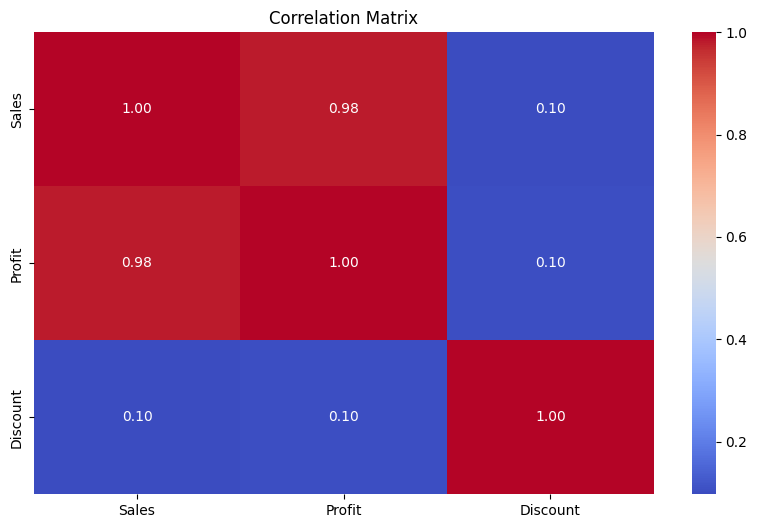

In [31]:
# Select only numerical columns
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Display as a heatmap

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()




Sales and Profit are highly correlated (0.98), meaning an increase in sales strongly relates to an increase in profit.
Discount has a very weak correlation (~0.10) with both Sales and Profit, indicating that offering discounts might not significantly impact sales or profits.

 3. Sales Trend Over Time

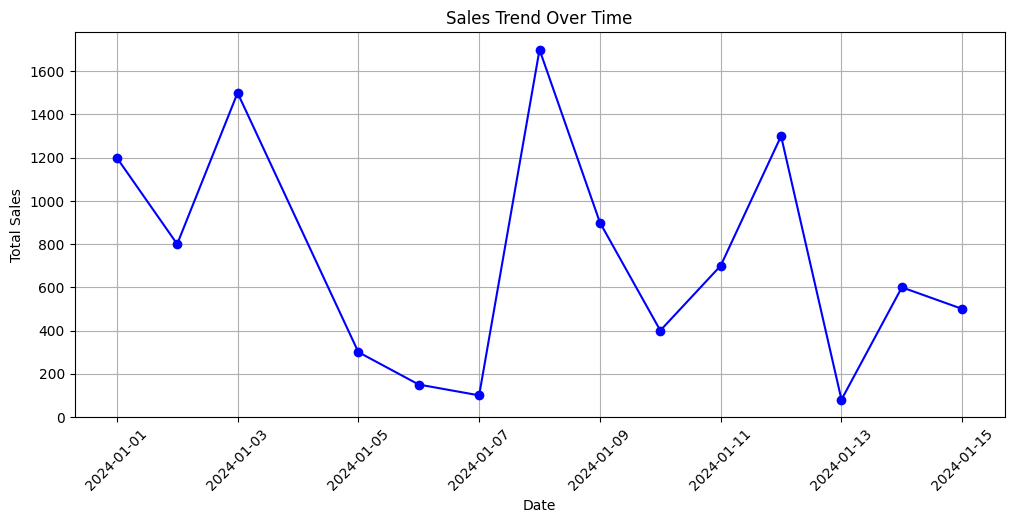

In [33]:
# Group sales by date
df_grouped = df.groupby("Date")["Sales"].sum()

# Plot sales trend
plt.figure(figsize=(12,5))
plt.plot(df_grouped, marker="o", linestyle="-", color="b")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Sales Trend Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()




Sales fluctuate significantly over time, with noticeable peaks and drops.
This could indicate seasonal trends, promotional events, or external factors influencing sales.

4. Sales by Region & Category

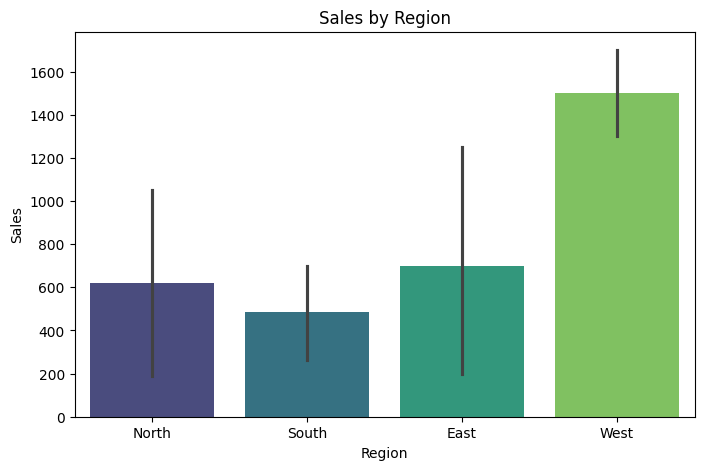

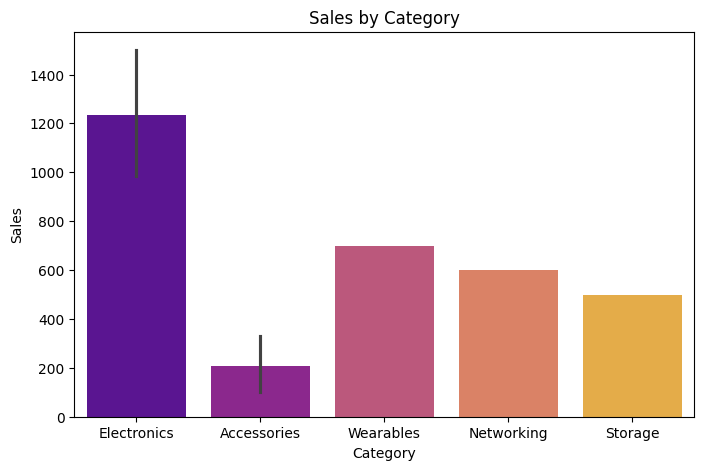

In [68]:

# Correct way to use Seaborn's barplot
plt.figure(figsize=(8,5))
sns.barplot(x=df["Region"], y=df["Sales"], hue=df["Region"], palette="viridis", legend=False)
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x=df["Category"], y=df["Sales"], hue=df["Category"], palette="plasma", legend=False)
plt.title("Sales by Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()





Region-wise: The West region has the highest sales, while the South region has the lowest.
Category-wise: Electronics dominates sales, while Accessories contribute the least

 5. Profit vs. Discount Analysis

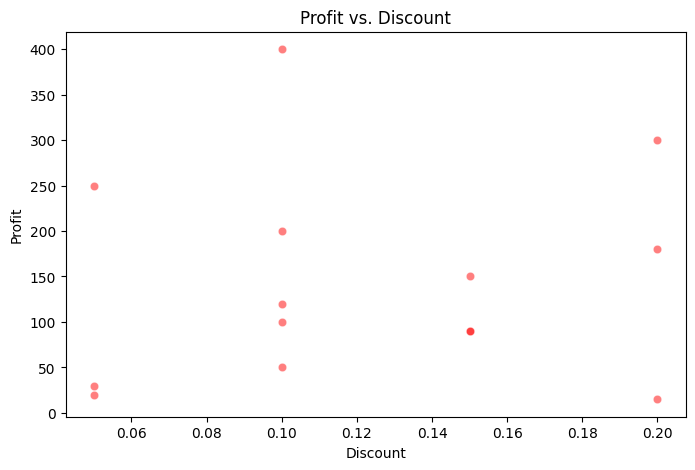

In [90]:
# Scatter plot for Profit vs. Discount
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Discount"], y=df["Profit"], alpha=0.5, color="red")
plt.title("Profit vs. Discount")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()


Insight:

Discounts do not have a direct linear correlation with profit. Some discounts may lead to increased profit, while others do not.
Additional factors (like sales volume, cost, and product category) might influence profitability rather than just discount percentage alone.

 6. Sales Distribution

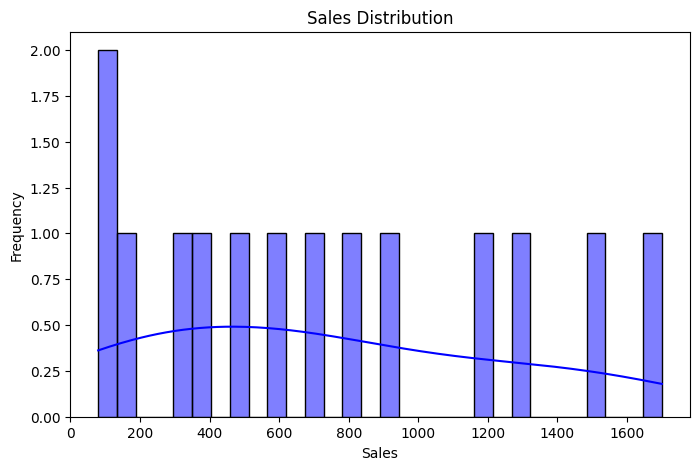

In [58]:
# Histogram for Sales distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Sales"], bins=30, kde=True, color="blue")
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()


Insight:

Most transactions involve lower sales amounts, while higher sales values are less common.
This suggests a business model with many small transactions rather than a few large ones.
Further investigation into the factors affecting high-value sales could help drive revenue growth.

# Predictive Modeling (Linear Regression)

1. Prepare Data for Model Training

In [60]:
# Define features (X) and target variable (y)
X = df[["Profit", "Discount"]]
y = df["Sales"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


2. Train the Linear Regression Model

In [64]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

 3. Make Predictions & Evaluate Performance

In [100]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 146.09782828472592
Mean Squared Error (MSE): 25869.6213239316
Root Mean Squared Error (RMSE): 160.84035974820375


# Conclusion
* The dataset contains right-skewed sales data.
* Most sales are in the lower range, while high-value sales are rare.
* Outliers exist and might require further investigation.
* Seasonal trends may influence sales performance.